In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math

In [2]:
plt.rcParams.update({'axes.titlesize' : 22,
                     'axes.labelsize' : 20,
                     'xtick.labelsize' : 18,
                     'ytick.labelsize' : 18})
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette(["#00A321","#5C3993", "#E28413", '#A31621', "#009FFD", '#F551A8', '#0F9E7A']))
priv_palette=sns.color_palette(["#00A321", "#00CC29", "#00F531", "#1FFF4B"])
unpriv_palette=sns.color_palette(["#5C3993","#6E45B0","#835DC0","#9A7BCC"])
MR_palette=sns.color_palette(["#A31621","#C51B29","#E22837","#E74B58"])
SES_palette=sns.color_palette(["#E28413","#ED9831","#F0AB56","#F4BE7C"])

In [3]:
exp_name = 'exp17F'
results_dir = '/home/emma/Documents/BC_Sim/results/' + exp_name + '/'

#import results 
stats_df1 = pd.read_csv(results_dir + 'naive.csv', index_col=0)
stats_df2 = pd.read_csv(results_dir + 'EqOppFPR.csv', index_col=0)
stats_df3 = pd.read_csv(results_dir + 'EqOppTPR.csv', index_col=0)
stats_df4 = pd.read_csv(results_dir + 'EqOdds.csv', index_col=0)

In [4]:
stats_df = pd.concat([stats_df1, stats_df2, stats_df3, stats_df4])
stats_df = stats_df.replace({'naive': 'Naive'}) #capitalize Naive for plotting purposes
stats_df

,year,n_priv,n_unpriv,n_healthy_priv,n_healthy_unpriv,n_BC_priv,n_BC_unpriv,n_died_priv,n_died_unpriv,n_screened_priv,...,lost_to_followup_frac,lost_to_followup_ratio,delay_ratio,delay_frac,t2_ratio,t2_frac,average_age_in_pool,t2_loc,n_sim,ai_fairness
0,0,250000,250000,249294,249267,706,733,60,161,249932,...,0.097651,1.105196,1.704918,0.218254,0.494000,0.988095,57.512893,-3.8,3479688010,Naive
1,1,250067,249933,249252,248877,815,1056,88,338,246592,...,0.097664,1.065456,2.272727,0.221994,0.627586,0.970195,57.564036,-3.8,3479688010,Naive
2,2,250150,249850,249317,248792,833,1058,83,386,246723,...,0.097424,1.060338,1.808824,0.195697,0.571192,0.972336,57.609620,-3.8,3479688010,Naive
3,3,250321,249679,249432,248681,889,998,89,330,246816,...,0.098628,1.040858,2.775862,0.219659,0.558587,0.973922,57.654756,-3.8,3479688010,Naive
4,4,250325,249675,249413,248643,912,1032,103,337,246921,...,0.096865,1.111498,1.945946,0.213099,0.545031,0.972630,57.697932,-3.8,3479688010,Naive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25495,46,251432,248568,250540,247570,892,998,136,352,248820,...,0.115885,2.087799,2.610169,0.222803,0.194805,0.096234,58.142715,2.1,683688611,EqOdds
25496,47,251381,248619,250475,247601,906,1018,127,344,248751,...,0.116539,2.051066,2.084507,0.223242,0.395349,0.122324,58.206516,2.1,683688611,EqOdds
25497,48,251372,248628,250428,247617,944,1011,115,334,248762,...,0.118436,2.057049,2.114286,0.215202,0.197531,0.095755,58.257519,2.1,683688611,EqOdds
25498,49,251422,248578,250513,247537,909,1041,106,362,248753,...,0.119169,2.007499,1.982759,0.177801,0.174419,0.103803,58.302508,2.1,683688611,EqOdds


In [5]:
#compute derived metrics
#group mortality rates
stats_df['MR_priv'] = stats_df['n_died_priv']/stats_df['n_priv']*1e5
stats_df['MR_unpriv'] = stats_df['n_died_unpriv']/stats_df['n_unpriv']*1e5
stats_df['deltaMR'] = stats_df['MR_unpriv']-stats_df['MR_priv']
stats_df['MR_ratio'] = stats_df['MR_unpriv']/stats_df['MR_priv']

#percent change in group avg SEI
stats_df['change_SEI_avg_priv'] = stats_df['SEI_avg_priv'].pct_change()*100
stats_df['change_SEI_avg_unpriv'] = stats_df['SEI_avg_unpriv'].pct_change()*100

#percent change in group median SEI
stats_df['change_SEI_med_priv'] = stats_df['SEI_med_priv'].pct_change()*100
stats_df['change_SEI_med_unpriv'] = stats_df['SEI_med_unpriv'].pct_change()*100

#inter-group deltaSEI
stats_df['inter_dSEI'] = np.absolute(stats_df['SEI_avg_priv']-stats_df['SEI_avg_unpriv'])

#percent change in inter-group deltaSEI 
stats_df['change_inter_dSEI'] = stats_df['inter_dSEI'].pct_change()*100

#intra-group deltaSEI
stats_df['intra_dSEI_priv'] = stats_df['SEI_max_priv']-stats_df['SEI_min_priv']
stats_df['intra_dSEI_unpriv'] = -stats_df['SEI_max_unpriv']-stats_df['SEI_min_unpriv']

stats_df['t2_ratio'] = stats_df['n_t2_unpriv']/stats_df['n_t2_priv']
stats_df['percent_unpriv_t2'] = stats_df['n_t2_unpriv']/stats_df['n_treated_unpriv'] 
stats_df['percent_priv_t2'] = stats_df['n_t2_priv']/stats_df['n_treated_priv'] 
stats_df['RR'] = stats_df['percent_unpriv_t2']/stats_df['percent_priv_t2'] #relative risk 
stats_df['risk_difference'] = stats_df['percent_priv_t2']-stats_df['percent_unpriv_t2']

In [6]:
loc_vals = stats_df.t2_loc.value_counts().index.values
print(loc_vals)

[-3.8  -1.9  -0.85  0.25  2.1 ]


In [7]:
for ai_fairness in ['Naive', 'EqOppFPR', 'EqOppTPR', 'EqOdds']:
    for loc in loc_vals: 
        avg = stats_df[(stats_df['t2_loc']==loc)&(stats_df['ai_fairness']==ai_fairness)]['percent_unpriv_t2'].mean()
        stats_df.loc[(stats_df['t2_loc']==loc)&(stats_df['ai_fairness']==ai_fairness), 'percent_unpriv_t2_avg'] = avg.round(2)

        avg = stats_df[(stats_df['t2_loc']==loc)&(stats_df['ai_fairness']==ai_fairness)]['percent_priv_t2'].mean()
        stats_df.loc[(stats_df['t2_loc']==loc)&(stats_df['ai_fairness']==ai_fairness), 'percent_priv_t2_avg'] = avg.round(2)

        avg = stats_df[(stats_df['t2_loc']==loc)&(stats_df['ai_fairness']==ai_fairness)]['t2_ratio'].mean()
        stats_df.loc[(stats_df['t2_loc']==loc)&(stats_df['ai_fairness']==ai_fairness), 't2_ratio_avg'] = avg.round(2)

<Axes: xlabel='percent_unpriv_t2', ylabel='Count'>

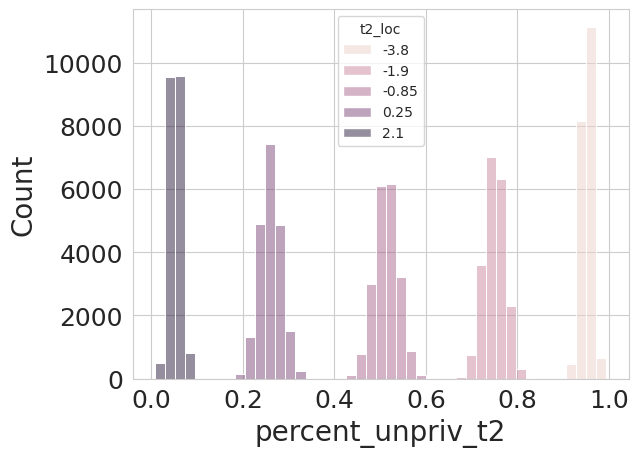

In [8]:
sns.histplot(stats_df, x='percent_unpriv_t2', hue='t2_loc')

<Axes: xlabel='percent_unpriv_t2', ylabel='Count'>

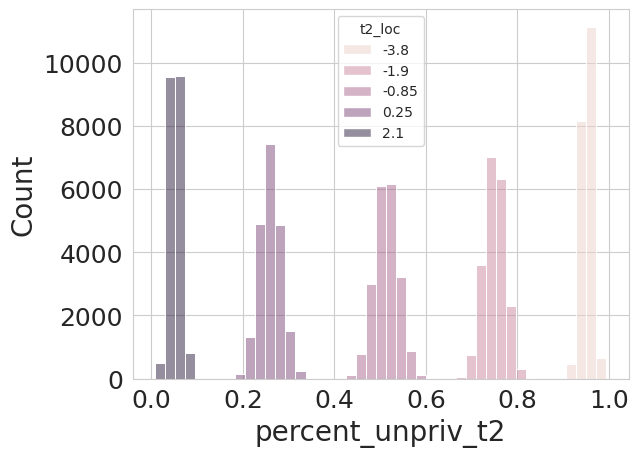

In [9]:
sns.histplot(stats_df, x='percent_unpriv_t2', hue='t2_loc')

In [10]:
def plt_MR(df, save=False): 
    #remove yr 1 from data
    df = df[df.year != 0]
    
    plt.figure(figsize=(10,6))
    # sns.pointplot(data=df.loc[(df['ai_fairness'] == 'Naive') | (df['ai_fairness'] == 'EqOdds')], x ='t2_loc', y='MR_priv', hue='ai_fairness', linestyles=["-", "--"], palette=priv_palette)
    # sns.pointplot(data=df.loc[(df['ai_fairness'] == 'Naive') | (df['ai_fairness'] == 'EqOdds')], x ='t2_loc', y='MR_unpriv', hue='ai_fairness', linestyles=["-", "--"], palette=unpriv_palette) 
    sns.lineplot(data=df.loc[(df['ai_fairness'] == 'Naive') | (df['ai_fairness'] == 'EqOdds')], x ='t2_loc', y='MR_priv', style='ai_fairness', hue='ai_fairness', marker='o', markersize=10, palette=priv_palette)
    sns.lineplot(data=df.loc[(df['ai_fairness'] == 'Naive') | (df['ai_fairness'] == 'EqOdds')], x ='t2_loc', y='MR_unpriv', style='ai_fairness', hue='ai_fairness', marker='o', markersize=10, palette=unpriv_palette)
    plt.title('50-yr Average Mortality Rate')
    plt.ylim([20,300])
    plt.xlabel(r'Adjuvant Treatment Parameter, $b_{t}$')
    plt.ylabel('50-yr Average Mortality Rate\n(per 100k)')
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()
    if save:
        plt.savefig(results_dir + 'MR.png', dpi=800)
        plt.savefig(results_dir + 'MR.svg')
    plt.show()

/tmp/ipykernel_125258/4245837463.py:8: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.lineplot(data=df.loc[(df['ai_fairness'] == 'Naive') | (df['ai_fairness'] == 'EqOdds')], x ='t2_loc', y='MR_priv', style='ai_fairness', hue='ai_fairness', marker='o', markersize=10, palette=priv_palette)
/tmp/ipykernel_125258/4245837463.py:9: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.lineplot(data=df.loc[(df['ai_fairness'] == 'Naive') | (df['ai_fairness'] == 'EqOdds')], x ='t2_loc', y='MR_unpriv', style='ai_fairness', hue='ai_fairness', marker='o', markersize=10, palette=unpriv_palette)


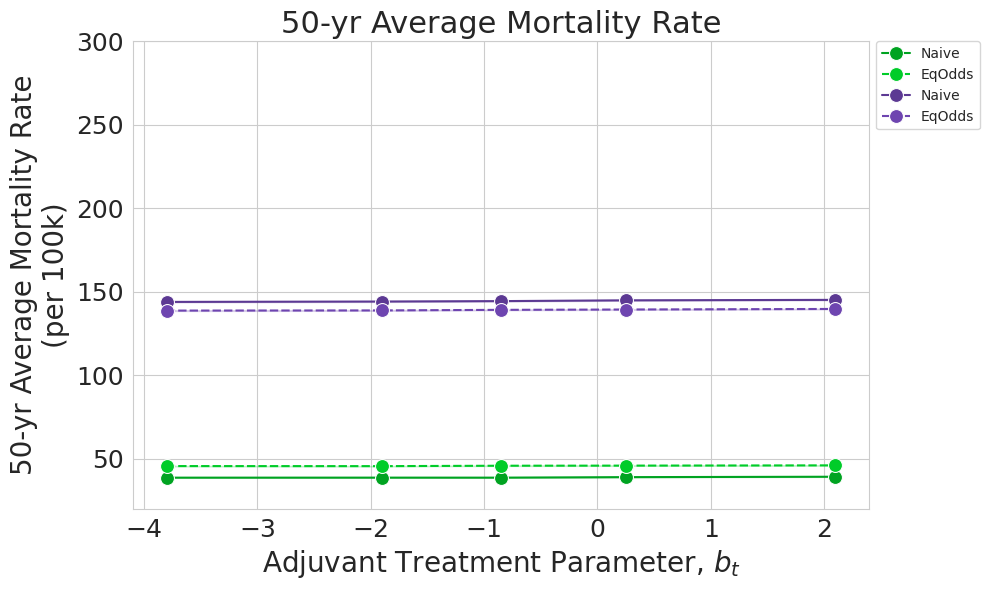

In [11]:
plt_MR(stats_df)

In [12]:
def plt_interdSEI(df, save=False): 
    #remove yr 1 from data
    df = df[df.year != 0]
    plt.figure(figsize=(10,6))
    # sns.pointplot(data=df.loc[(df['ai_fairness'] == 'Naive') | (df['ai_fairness'] == 'EqOdds')], x ='t2_loc', y='inter_dSEI', hue='ai_fairness', linestyles=["-", "--"], palette=SES_palette)   
    sns.lineplot(data=df.loc[(df['ai_fairness'] == 'Naive') | (df['ai_fairness'] == 'EqOdds')], x ='t2_loc', y='inter_dSEI', style='ai_fairness', hue='ai_fairness', marker='o', markersize=8, palette=SES_palette)
    plt.title(f'50-yr Average SEI Disparity')
    plt.xlabel(r'Adjuvant Treatment Parameter, $b_{t}$')
    plt.ylabel('50-yr Average SEI Disparity')
    plt.ylim([1.970, 2.015])
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()
    if save:
        plt.savefig(results_dir + 'dSEI.png', dpi=800)
        plt.savefig(results_dir + 'dSEI.svg')
    plt.show()

/tmp/ipykernel_125258/1611498347.py:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.lineplot(data=df.loc[(df['ai_fairness'] == 'Naive') | (df['ai_fairness'] == 'EqOdds')], x ='t2_loc', y='inter_dSEI', style='ai_fairness', hue='ai_fairness', marker='o', markersize=8, palette=SES_palette)


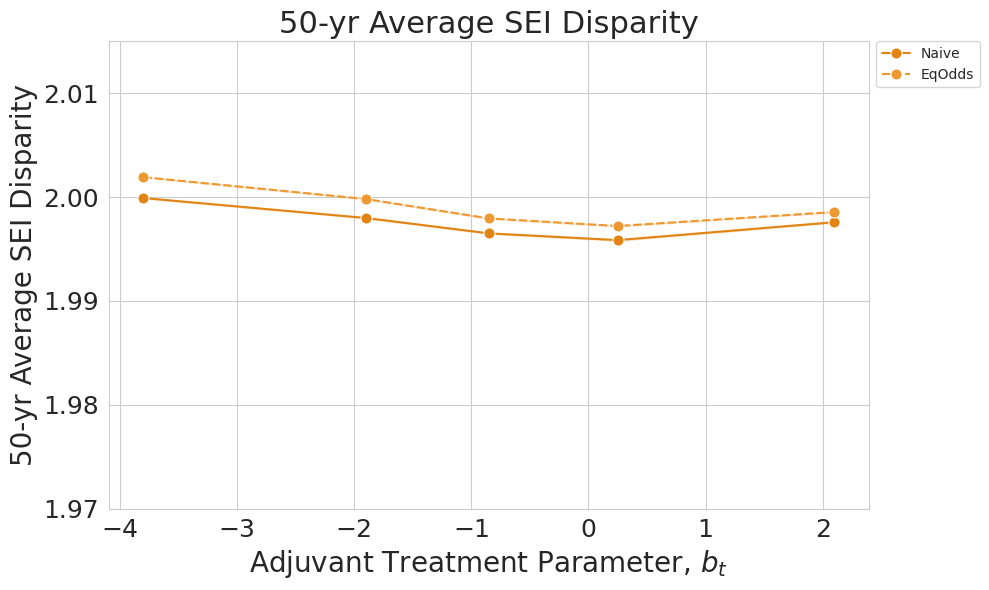

In [13]:
plt_interdSEI(stats_df)

In [14]:
def compute_avg_metrics(df, metric_col, ai_fairness, loc):
    '''
    compute 50-year average for a single metric across all simulations
    '''
        
    #remove yr 1 from data
    df = df[df.year != 0]
    
    #get dataframe for specific fairness scenario
    df = df.loc[(df['ai_fairness'] == ai_fairness) & (df['t2_loc'] == loc)]
    # print(len(df))

    stats = df.groupby(['n_sim'])[metric_col].agg(['mean', 'count', 'std'])
    # print(stats)
    print('-'*75)
    
    #get 95% confidence interval of average metric over all simulations
    m = stats['mean'].mean()
    s = stats['mean'].std()
    c = stats['mean'].count()

    ci95_hi = m + 1.96*s/math.sqrt(c)
    ci95_low = m - 1.96*s/math.sqrt(c)

    print(f'average (95%CI) {metric_col} for {ai_fairness} and loc = {loc} over {c} simulations: {m:.2f} ({ci95_low:.2f}, {ci95_hi:.2f})')
    print('-'*75)

In [15]:
for ai_fairness in ['Naive', 'EqOppFPR', 'EqOppTPR', 'EqOdds']:
    for metric in ['MR_priv', 'MR_unpriv']:
        for loc in loc_vals:
            compute_avg_metrics(stats_df, metric, ai_fairness, loc)

---------------------------------------------------------------------------
average (95%CI) MR_priv for Naive and loc = -3.8 over 100 simulations: 38.61 (38.50, 38.71)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average (95%CI) MR_priv for Naive and loc = -1.9 over 100 simulations: 38.62 (38.52, 38.73)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average (95%CI) MR_priv for Naive and loc = -0.85 over 100 simulations: 38.61 (38.51, 38.72)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average (95%CI) MR_priv for Naive and loc = 0.25 over 100 simulations: 38.93 (38.82, 39.04)
---------------------------------------------------------------------------
-----------------------

In [16]:
for ai_fairness in ['Naive', 'EqOppFPR', 'EqOppTPR', 'EqOdds']:
    for metric in ['SEI_avg_priv', 'SEI_avg_unpriv']:
        for loc in loc_vals:
            compute_avg_metrics(stats_df, metric, ai_fairness, loc)

---------------------------------------------------------------------------
average (95%CI) SEI_avg_priv for Naive and loc = -3.8 over 100 simulations: 0.97 (0.97, 0.97)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average (95%CI) SEI_avg_priv for Naive and loc = -1.9 over 100 simulations: 0.97 (0.97, 0.97)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average (95%CI) SEI_avg_priv for Naive and loc = -0.85 over 100 simulations: 0.98 (0.98, 0.98)
---------------------------------------------------------------------------


---------------------------------------------------------------------------
average (95%CI) SEI_avg_priv for Naive and loc = 0.25 over 100 simulations: 0.98 (0.98, 0.98)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average (95%CI) SEI_avg_priv for Naive and loc = 2.1 over 100 simulations: 0.98 (0.98, 0.98)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average (95%CI) SEI_avg_unpriv for Naive and loc = -3.8 over 100 simulations: -1.03 (-1.03, -1.03)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average (95%CI) SEI_avg_unpriv for Naive and loc = -1.9 over 100 simulations: -1.02 (-1.03, -1.02)
---------------------------------------------------------------------------
-------

In [17]:
for ai_fairness in ['Naive', 'EqOppFPR', 'EqOppTPR', 'EqOdds']:
    for metric in ['percent_priv_t2', 'percent_unpriv_t2']:
        for loc in loc_vals:
            compute_avg_metrics(stats_df, metric, ai_fairness, loc)

---------------------------------------------------------------------------
average (95%CI) percent_priv_t2 for Naive and loc = -3.8 over 100 simulations: 0.98 (0.98, 0.98)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average (95%CI) percent_priv_t2 for Naive and loc = -1.9 over 100 simulations: 0.89 (0.89, 0.89)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average (95%CI) percent_priv_t2 for Naive and loc = -0.85 over 100 simulations: 0.74 (0.74, 0.74)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average (95%CI) percent_priv_t2 for Naive and loc = 0.25 over 100 simulations: 0.49 (0.49, 0.49)
---------------------------------------------------------------------------


---------------------------------------------------------------------------
average (95%CI) percent_priv_t2 for Naive and loc = 2.1 over 100 simulations: 0.13 (0.13, 0.13)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average (95%CI) percent_unpriv_t2 for Naive and loc = -3.8 over 100 simulations: 0.95 (0.95, 0.95)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average (95%CI) percent_unpriv_t2 for Naive and loc = -1.9 over 100 simulations: 0.75 (0.75, 0.75)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average (95%CI) percent_unpriv_t2 for Naive and loc = -0.85 over 100 simulations: 0.51 (0.51, 0.51)
--------------------------------------------------------------------------